In [167]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

# Base Dataset

In [162]:
filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names)
df.shape[0]

200000

Text(0.5, 0.98, 'Year of Birth Distribution')

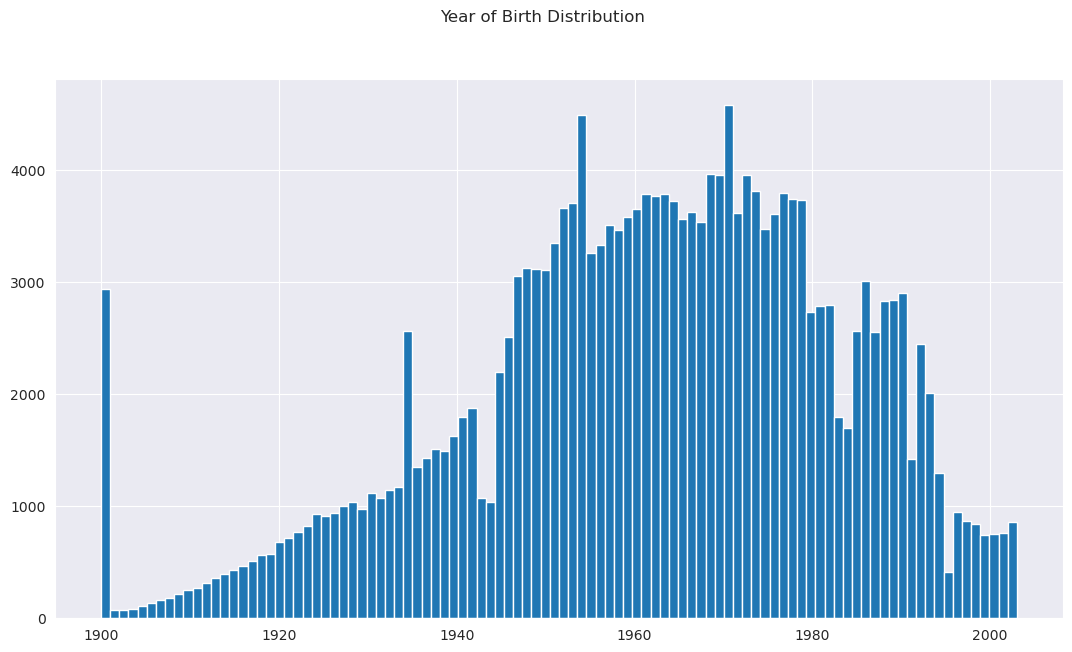

In [206]:
df["YEAROFBIRTH"].hist(bins=100, figsize=[13, 7])
plt.suptitle("Year of Birth Distribution")

Text(0.5, 1.0, 'Gender Distribution')

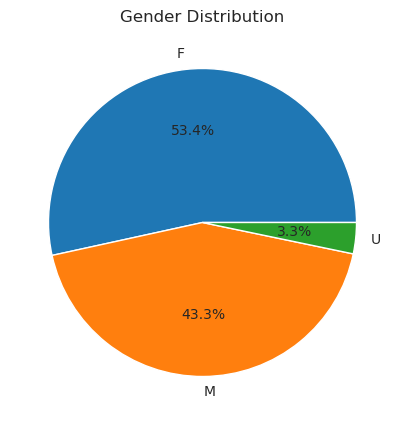

In [196]:
gender_dist = df.groupby(["GENDER"]).size()
plt.pie(x=[v for _, v in gender_dist.items()], labels=[k for k, _ in gender_dist.items()], autopct='%1.1f%%')
plt.title("Gender Distribution")

<AxesSubplot:title={'center':'Race Distribution'}>

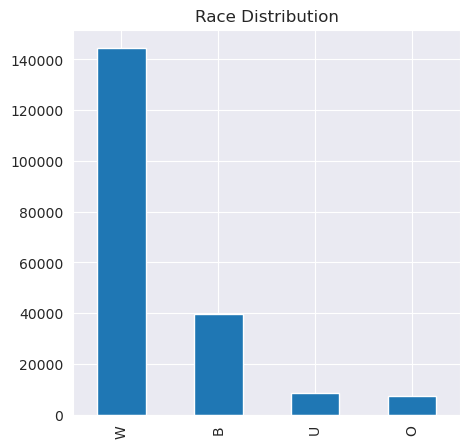

In [203]:
df.RACE.map(lambda v: "O" if v in ["I", "A", "M", "P"] else v).value_counts().plot.bar(title="Race Distribution")

In [209]:
df.PLZ.map(lambda plz: str(plz)[:2]).value_counts()

28    100811
27     98806
na       369
30         3
37         3
99         3
25         1
20         1
24         1
29         1
9.         1
Name: PLZ, dtype: int64

## Random subsets

In [55]:
runs_random = mlflow.search_runs(experiment_ids=["651112999057083515"])
len(runs_random)

1290

In [56]:
runs_random = runs_random.apply(pd.to_numeric, errors="ignore")

In [75]:
runs_random["params.seed"]

0       1
1       1
2       1
3       1
4       1
       ..
1285    1
1286    1
1287    1
1288    1
1289    1
Name: params.seed, Length: 1290, dtype: int64

In [85]:
runs_random_mean = runs_random.groupby(by=["params.overlap", "params.size"]).mean()
len(runs_random_mean)

/tmp/ipykernel_8277/3119788190.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs_random_mean = runs_random.groupby(by=["params.overlap", "params.size"]).mean()


129

In [160]:
def colormap(metric, title):
    cmap = "spring"  # "cool"
    fig, ax = plt.subplots()
    _metric = runs_random_mean[f"metrics.{metric}"]
    g = sns.scatterplot(x="params.size", y="params.overlap", data=runs_random_mean, c=_metric, cmap=cmap, size=_metric, legend=False)
    g.set_xlabel("Subset Size")
    g.set_ylabel("Overlap")

    norm = plt.Normalize(_metric.min(), _metric.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    ax.figure.colorbar(sm, cax=cax)

    plt.suptitle(title)

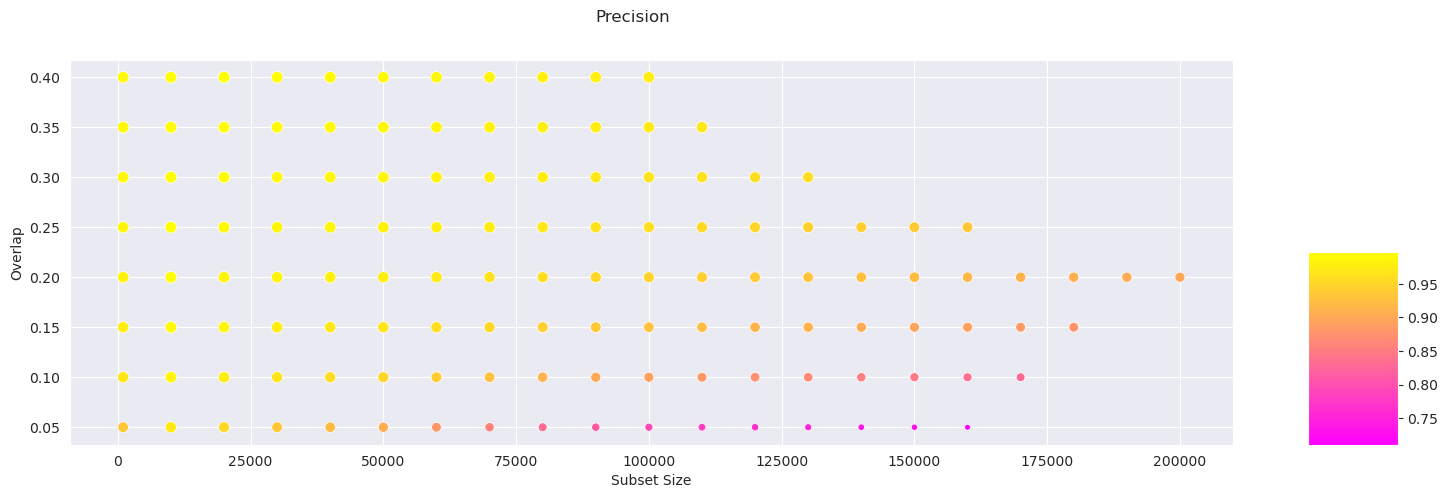

In [161]:
colormap("precision", "Precision")

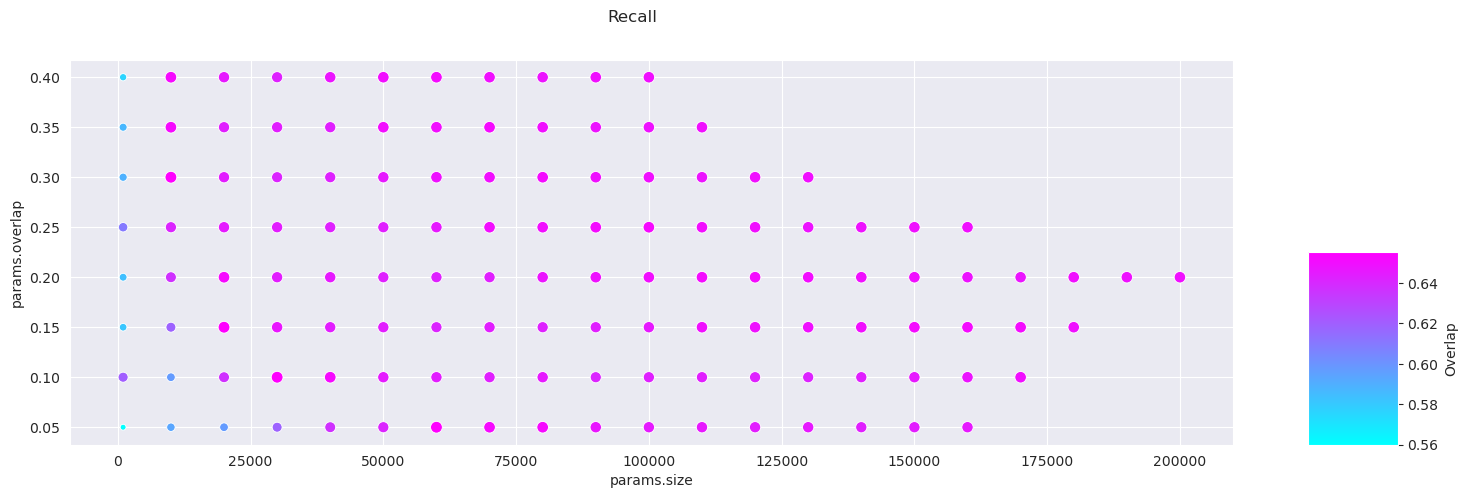

In [148]:
colormap("recall", "Recall")

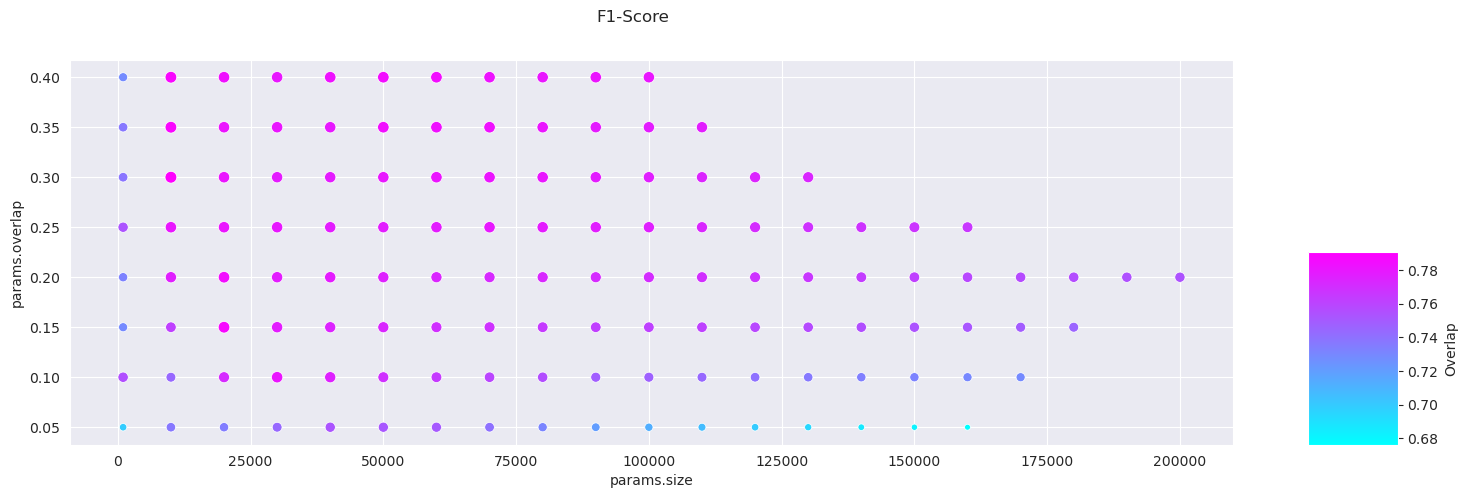

In [149]:
colormap("fscore", "F1-Score")

### Influence of subset size

In [57]:
overlap = 0.2
random_many_sizes = runs_random[(runs_random["params.subset_selection"] == "RANDOM") &
                                (runs_random["params.overlap"] == overlap)]
len(random_many_sizes)

210

In [42]:
# set figure size
plt.rcParams['figure.figsize'] = [20, 10]

Text(0, 0.5, 'Precision')

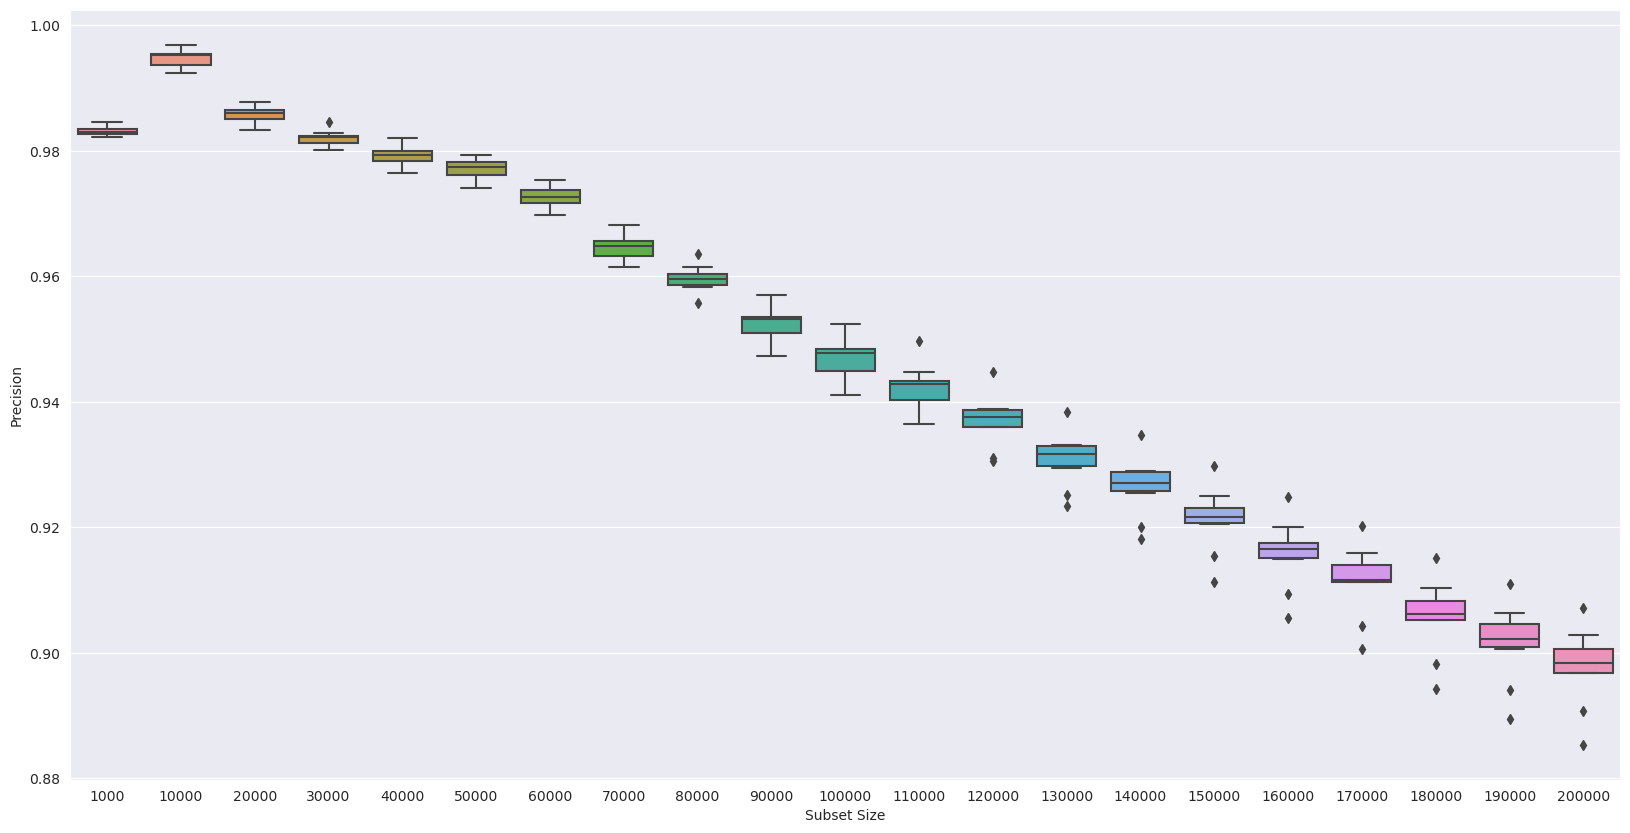

In [15]:
sns.boxplot(x="params.size", y="metrics.precision", data=random_many_sizes)
plt.xlabel("Subset Size")
plt.ylabel("Precision")

Text(0, 0.5, 'Recall')

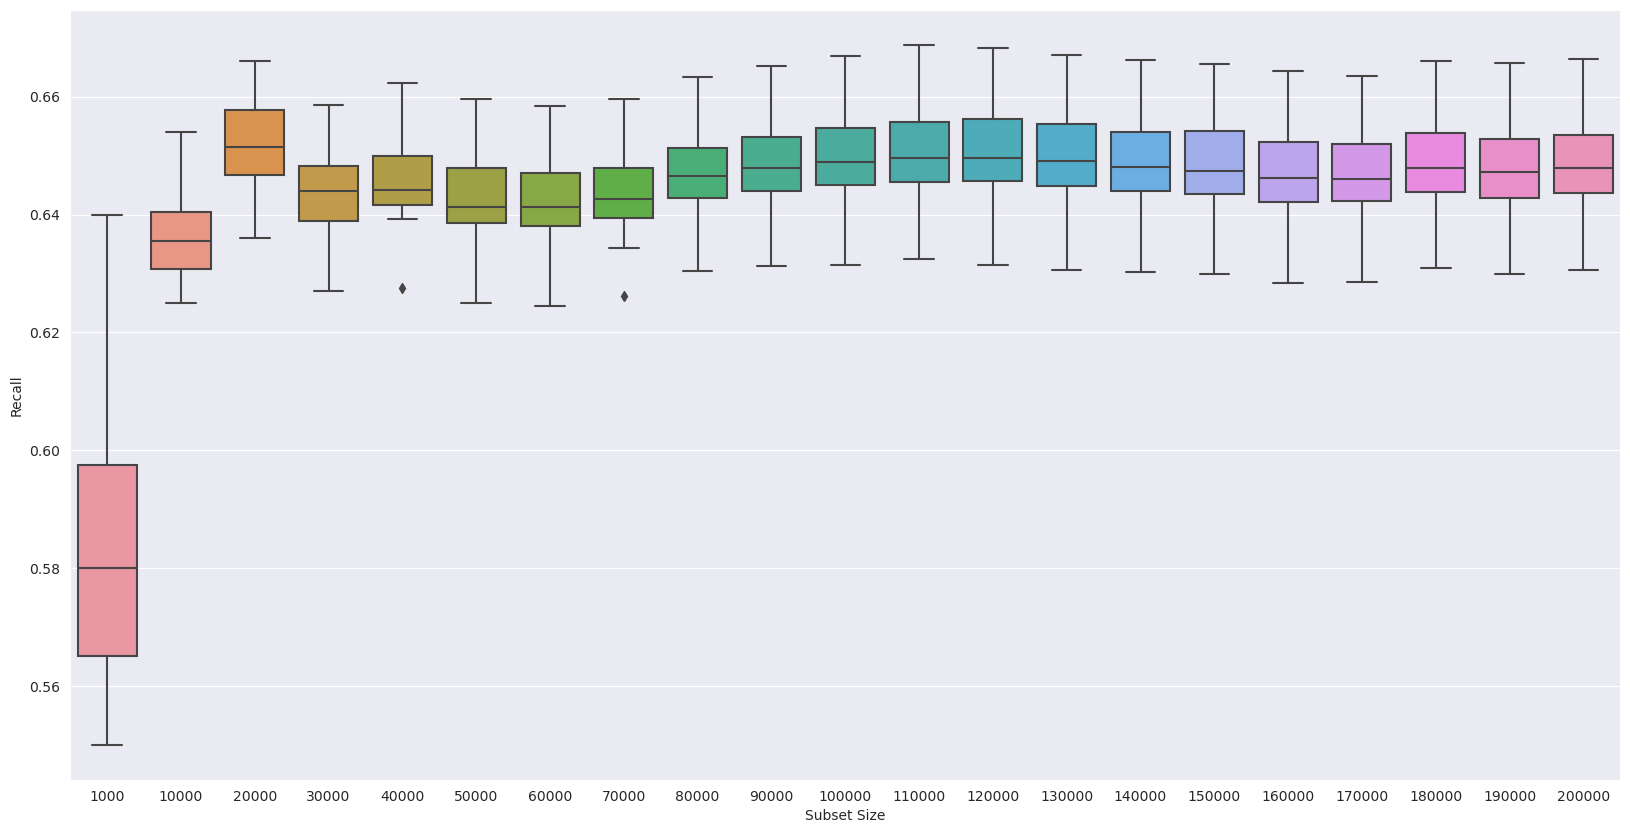

In [16]:
sns.boxplot(x="params.size", y="metrics.recall", data=random_many_sizes)
plt.xlabel("Subset Size")
plt.ylabel("Recall")

Text(0, 0.5, 'F1-Score')

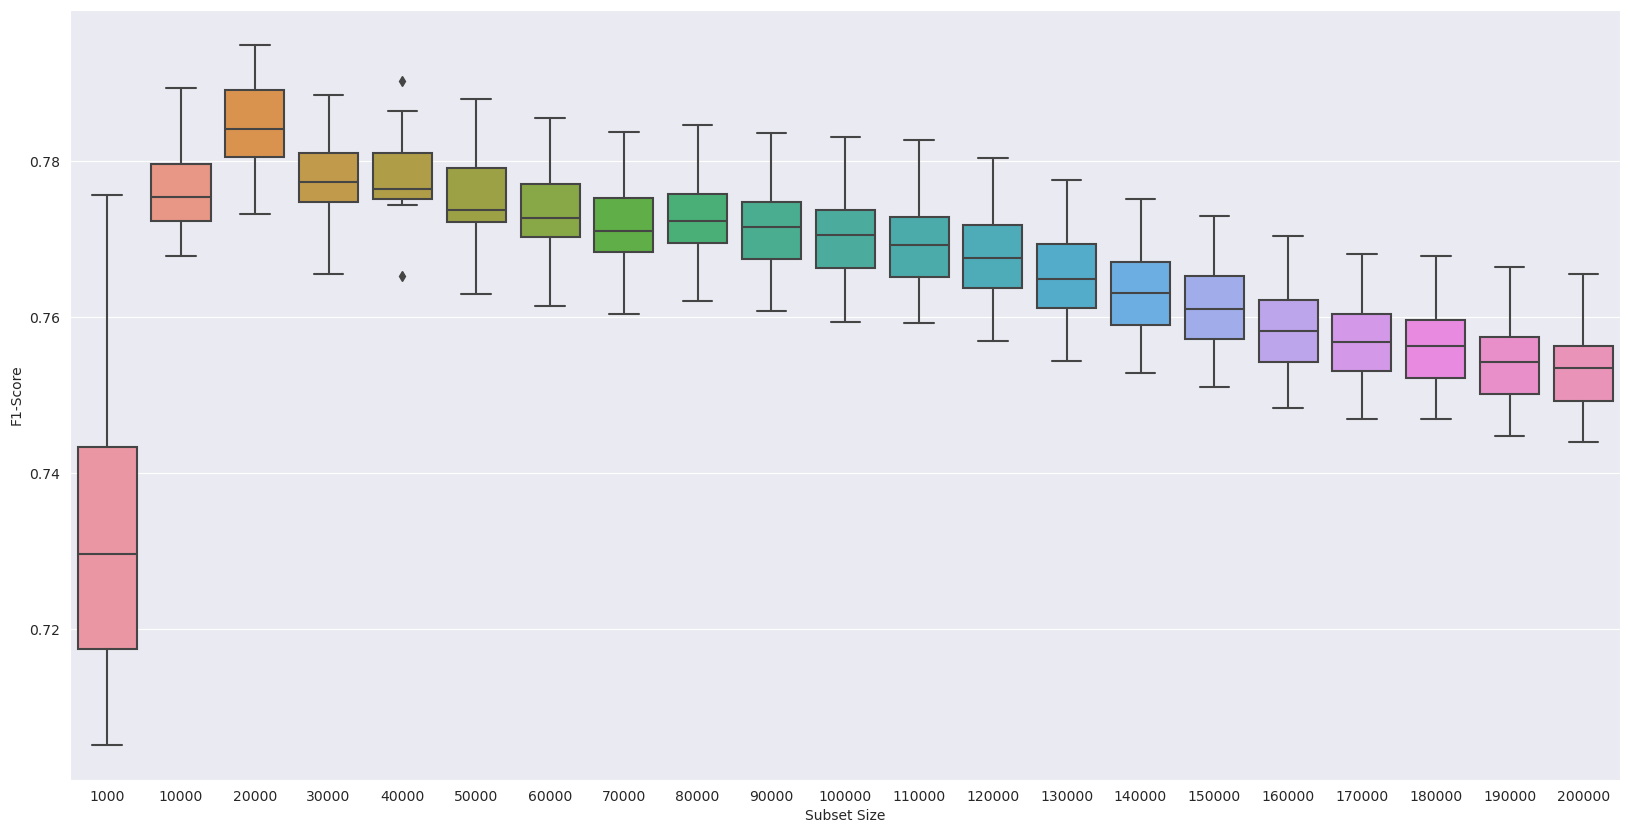

In [17]:
sns.boxplot(x="params.size", y="metrics.fscore", data=random_many_sizes)
plt.xlabel("Subset Size")
plt.ylabel("F1-Score")

## Influence of Overlap

In [32]:
random_many_overlaps = runs_random[(runs_random["params.subset_selection"] == "RANDOM") &
                                   (runs_random["params.size"] == 100000)]
len(random_many_overlaps)

80

Text(0, 0.5, 'Precision')

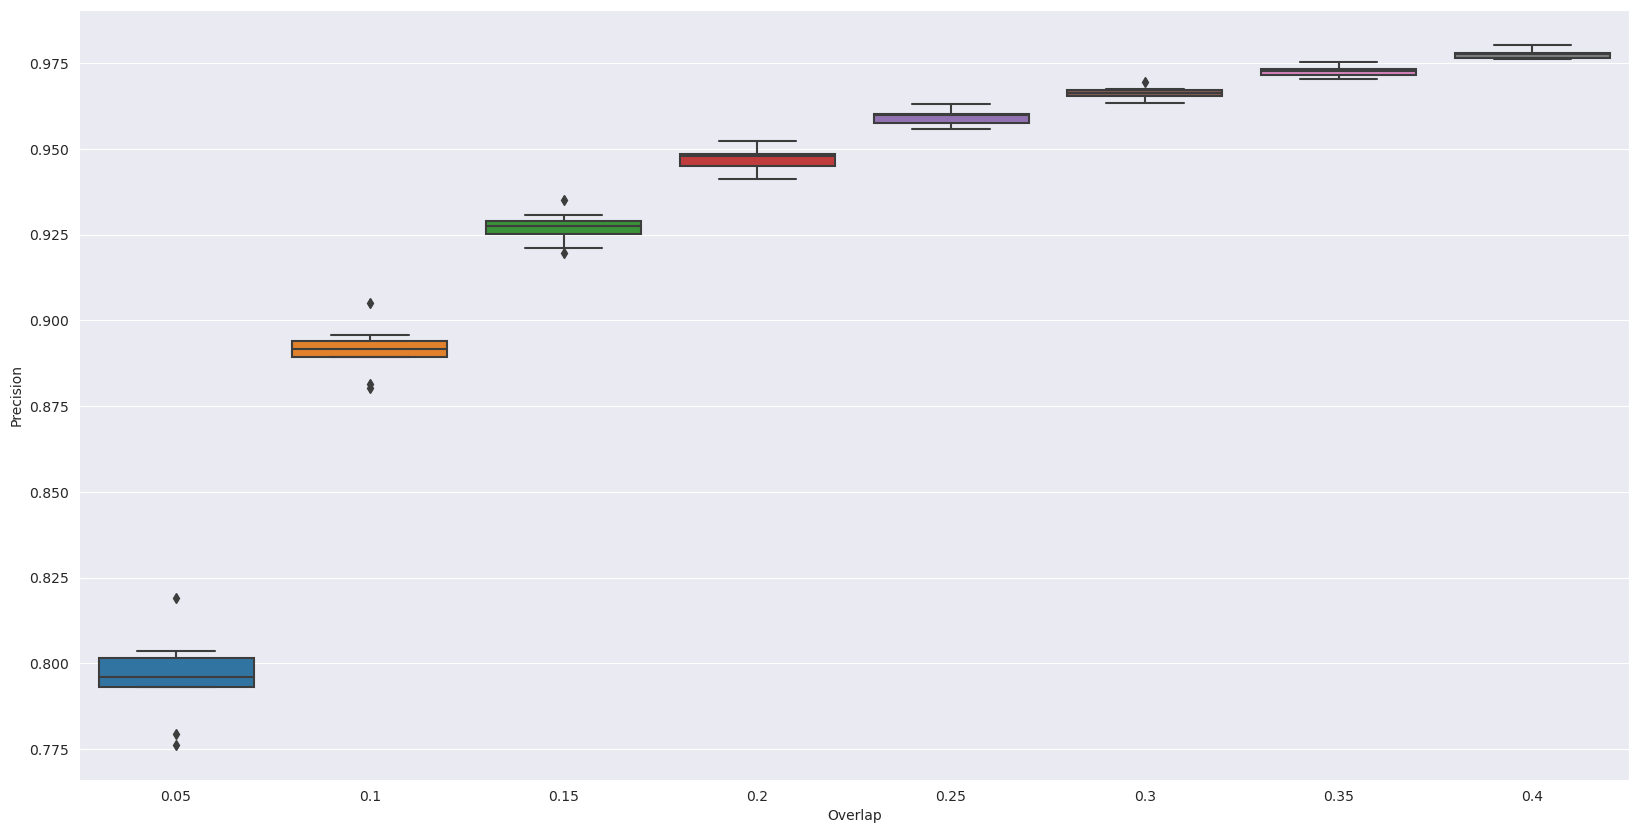

In [49]:
sns.boxplot(x="params.overlap", y="metrics.precision", data=random_many_overlaps)
plt.xlabel("Overlap")
plt.ylabel("Precision")
plt.ylim([0.6, 1])

(0.6, 0.9)

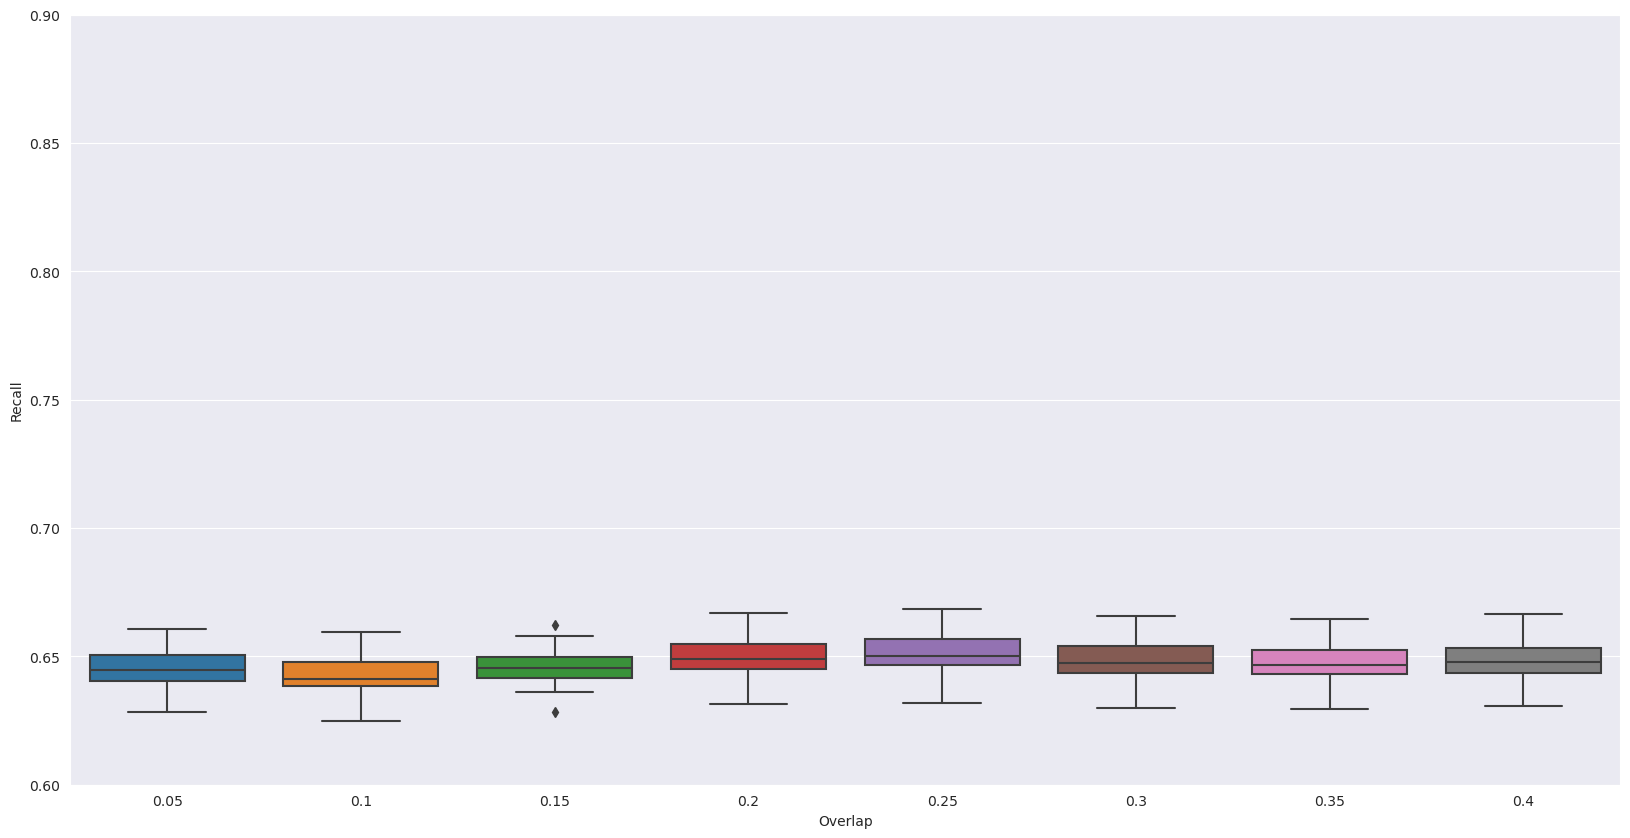

In [46]:
sns.boxplot(x="params.overlap", y="metrics.recall", data=random_many_overlaps)
plt.xlabel("Overlap")
plt.ylabel("Recall")
plt.ylim([0.6, 1])

(0.6, 0.9)

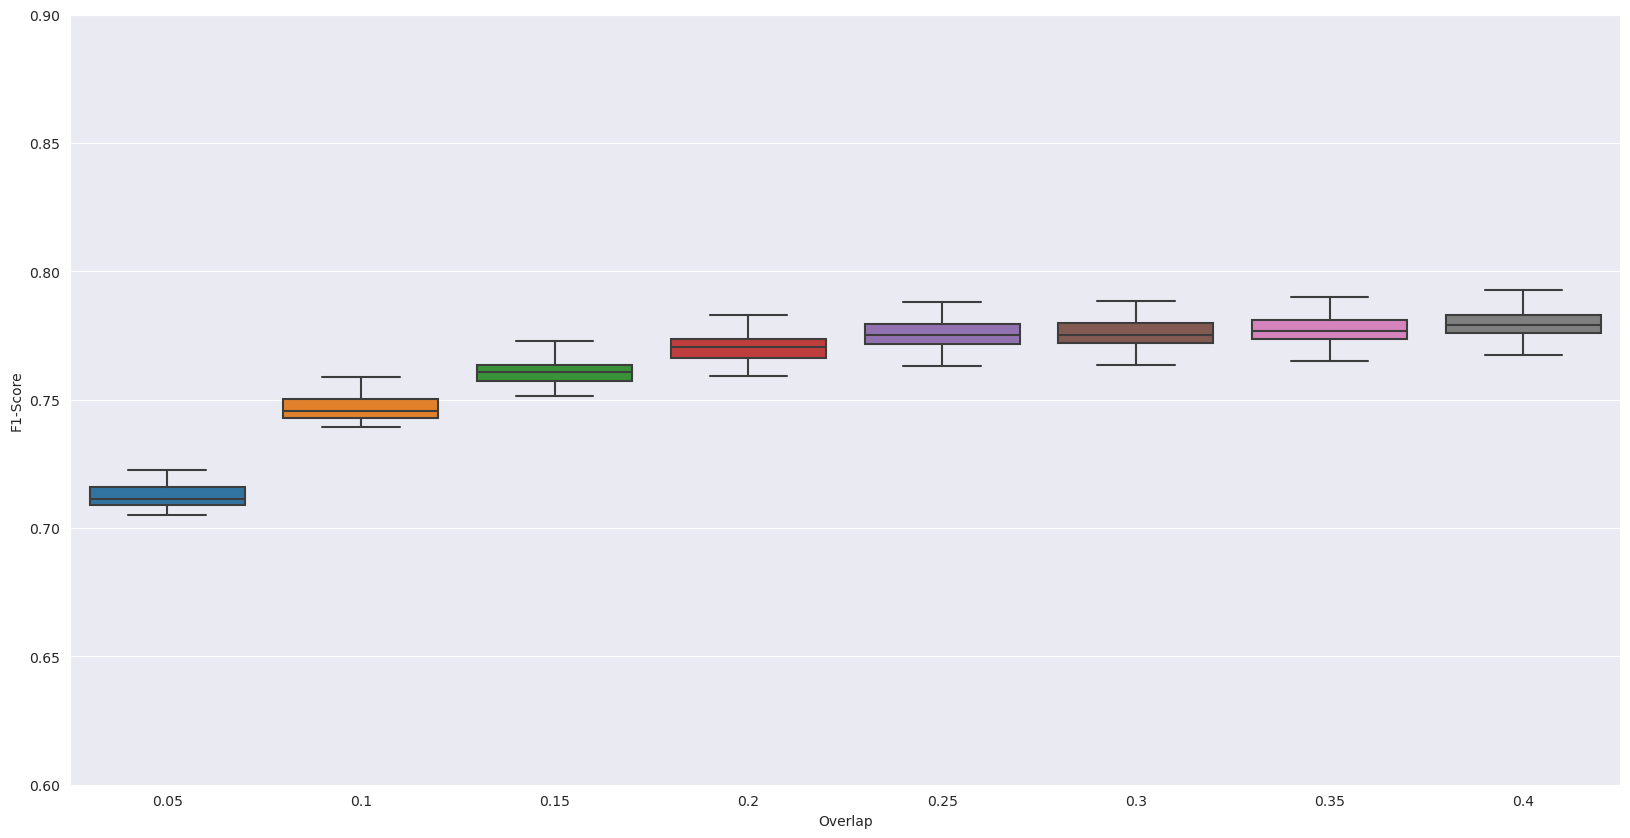

In [43]:
sns.boxplot(x="params.overlap", y="metrics.fscore", data=random_many_overlaps)
plt.xlabel("Overlap")
plt.ylabel("F1-Score")
plt.ylim([0.6, 1])

# Age, PLZ, Gender Subsets

In [21]:
runs_rest = mlflow.search_runs(experiment_ids=["337062275817683573", "331509985598984853"])
len(runs_rest)

208

In [22]:
runs_age = runs_rest[runs_rest["params.subset_selection"]=="AGE"]
len(runs_age)

78

In [23]:
runs_plz = runs_rest[runs_rest["params.subset_selection"]=="PLZ"]
len(runs_plz)

52

In [24]:
runs_gender = runs_rest[(runs_rest["params.subset_selection"]=="ATTRIBUTE_VALUE")
                        & (runs_rest["params.column"]=="GENDER")]
len(runs_gender)

78

## Age

In [25]:
runs_age.groupby(["params.range"]).size()

params.range
[20, 39]      26
[40, 59]      26
[60, 1000]    26
dtype: int64

In [26]:
map_age_range = {
    "[20, 39]": "0-39",
    "[40, 59]": "40-59",
    "[60, 1000]": ">60"
}

In [28]:
runs_age["params.range"] = runs_age["params.range"].apply(lambda v: map_age_range.get(v, v))

/tmp/ipykernel_8277/2125919133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_age["params.range"] = runs_age["params.range"].apply(lambda v: map_age_range.get(v, v))


In [34]:
runs_age = runs_age.sort_values(by="params.range")

In [144]:
def compare_metrics(data, param, param_name, title):
    plt.rcParams['figure.figsize'] = [15, 5]
    fig, ax = plt.subplots(1, 3, sharey=True)
    sns.boxplot(data=data, x=f"params.{param}", y="metrics.precision", ax=ax[0])
    sns.boxplot(data=data, x=f"params.{param}", y="metrics.recall", ax=ax[1])
    sns.boxplot(data=data, x=f"params.{param}", y="metrics.fscore", ax=ax[2])
    ax[0].set_ylabel("Precision")
    ax[1].set_ylabel("Recall")
    ax[2].set_ylabel("F1-Score")
    [x.set_xlabel(param_name) for x in ax]
    fig.suptitle(title)
    fig.show()

/tmp/ipykernel_8277/4143205161.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


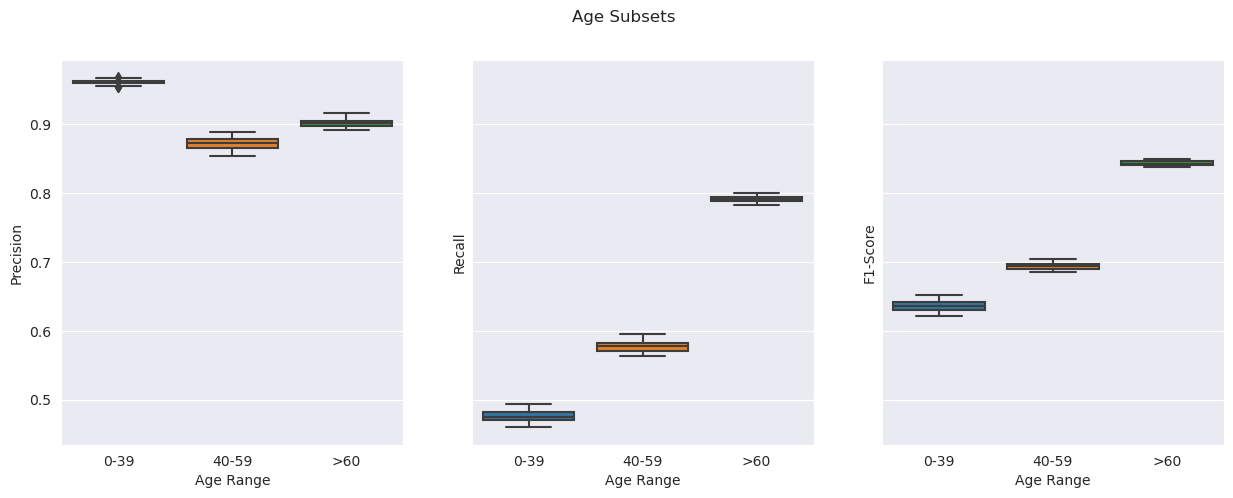

In [145]:
compare_metrics(runs_age, "range", "Age Range", "Age Subsets")

0-39:
* precision high -> not many FP
* recall low -> many FN
* -> need lower t or lower k ?

## PLZ

/tmp/ipykernel_8277/4143205161.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


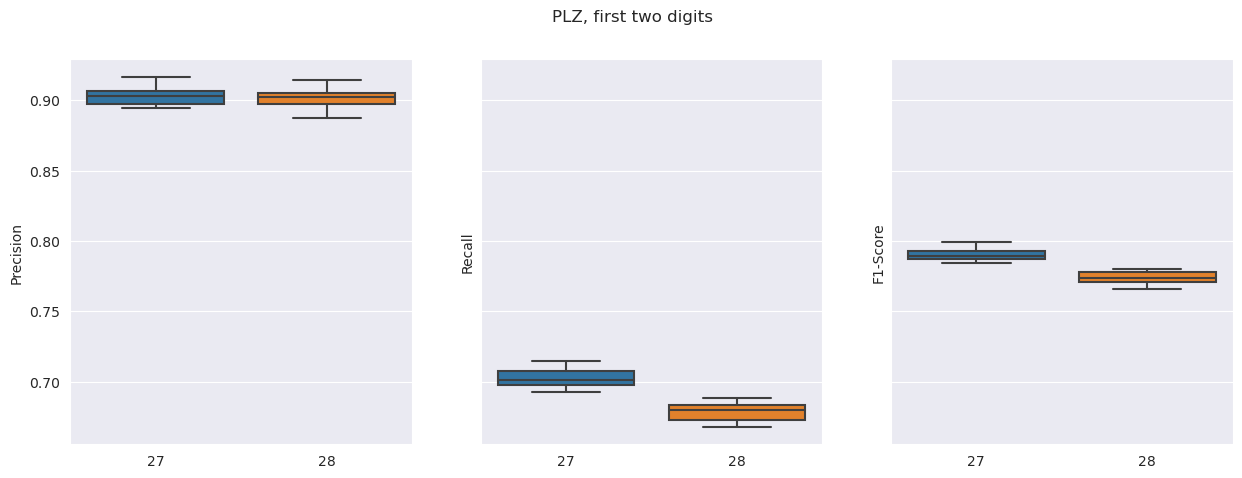

In [147]:
compare_metrics(runs_plz, "equals", "", "PLZ, first two digits")

Nothing special hereS

/tmp/ipykernel_8277/4143205161.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


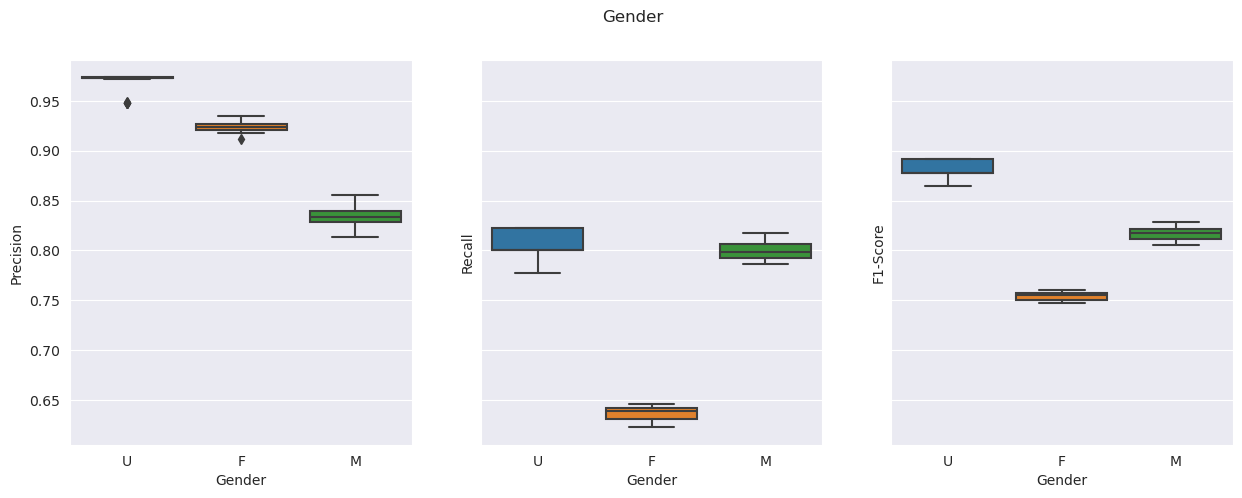

In [208]:
compare_metrics(runs_gender, "equals", "Gender", "Gender")